<h1>Gathering information on Segment </h1>
Each segment can have multipe Telraams.The code below illustrates how to get that information

In [116]:
import requests
import json
import pandas as pd

Retrieve all the segments in one API - call

In [117]:
segments = requests.get("https://telraam-api.net/v0/segments/active")
print(segments.status_code)

200


Count the number of segments

In [118]:
segment_id = [x['properties']['id'] for x in  segments.json()['features'][:]]
print('There are ',len(segment_id),' segments')

There are  751  segments


Loop over all the segments and retrieve the number of Cameras per segment

In [119]:
url_base = 'https://telraam-api.net/v0/cameras/segment/'

In [120]:
counter = np.zeros_like(segment_id)

for  i  in np.arange(0,len(segment_id)):
    url = url_base + str(segment_id[i])
    telraam_segment = requests.get(url)
    c = int(len(telraam_segment.json()['camera']))
    counter[i] = c


Putting this in a pandas DataFrame

In [121]:
df = pd.DataFrame(counter,index=segment_id,columns=['Nbr'])


In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

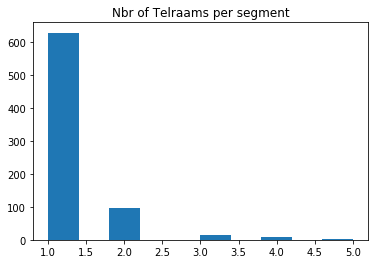

In [123]:
ax =df.hist(grid=False)
ax[0,0].set_title('Nbr of Telraams per segment');

<h1>Locating the best "equiped" segment in Leuven </h1>

In [124]:
df.sort_values(by='Nbr',inplace=True,ascending=False)
df.head(4)

,Nbr
122431,5
122431,5
2000026769,4
2000026769,4


In [125]:
seg_id = df.index[0]
print('Best Equiped Segment:',seg_id)

Best Equiped Segment: 122431


In [126]:
url_most_active_segment = 'https://telraam-api.net/v0/segments/id/'+str(seg_id)

In [127]:
most_active = requests.get(url_most_active_segment)
print(most_active.status_code)

200


The coordinates form a polyline decribing the segment

In [134]:
co = np.array(most_active.json()['features'][0]['geometry']['coordinates'][0])

In [135]:
df_co = pd.DataFrame(co,columns=['longitude','latitude'])
df_co

,longitude,latitude
0,4.440600,51.169617
1,4.440682,51.169686
2,4.440759,51.169745
3,4.440836,51.169800
4,4.440893,51.169832
5,4.441236,51.170023
6,4.441761,51.170316
7,4.442704,51.170847
8,4.442827,51.170925
9,4.442944,51.171006
